# Architecture Comparision

In [1]:
# Check Count

import pandas as pd
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
for name in os.listdir(main_path):
    model_name = name.split('_')[-1]
    df = pd.read_csv(os.path.join(main_path, name, model_name+'_Hyperparameter.csv'))
    shape = df[df['Title']=='Random_Plotting'].shape
    print(name, shape)

7_ccccff (50, 11)
12_ccccfff (50, 11)
3_cccff (50, 11)
1_ccff (50, 11)
13_cccfff (50, 11)
14_ccfff (50, 11)
2_cff (50, 11)
4_cf (50, 11)
11_cccccfff (50, 11)
10_cccccff (50, 11)
5_ccf (50, 11)
6_cccf (50, 11)
8_ccccf (50, 11)
9_cccccf (50, 11)
15_cfff (50, 11)


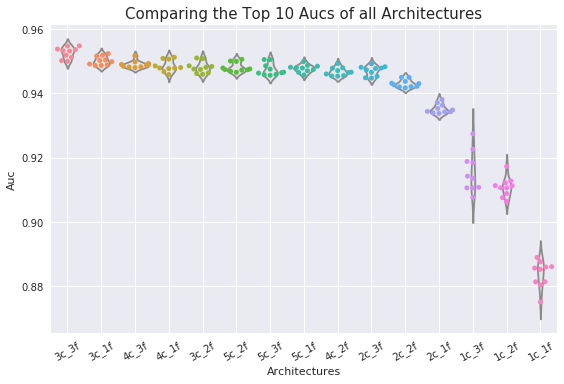

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

plot_auc = []
names = []
for folder in os.listdir(main_path):
    name =  folder.split('_')[-1]
    c = 0
    f = 0
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    name_new = str(c)+'c_'+str(f)+'f'
    names.append(name_new)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    plot_auc.append(df[df['Title']=='Random_Plotting'].sort_values(by='Auc', ascending=False).head(10)['Auc'].values.tolist())
    

    
df_plot = pd.DataFrame(np.array(plot_auc).T, columns=names)
df_plot = df_plot[df_plot.max().sort_values(ascending=False).index]

df_swarm = pd.melt(df_plot)
df_swarm.columns = ['Architectures', 'Auc']
sns.set(style='darkgrid', font='DejaVu Sans')
plt.title('Comparing the Top 10 Aucs of all Architectures', fontsize=15)
sns.violinplot(x="Architectures", y="Auc", data=df_swarm, inner=None, color=".9")
sns.swarmplot(x="Architectures", y="Auc", data=df_swarm)
plt.xticks(rotation=30)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('01_Finished_Plots/Randomized_Model_Comparision.svg')
plt.show()

# Layer Hyperspace

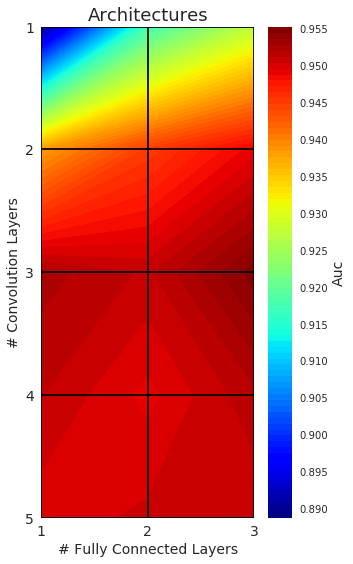

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

font_big = 18
font_small = 14

plot_auc = []
names = []
for folder in os.listdir(main_path):
    name =  folder.split('_')[-1]
    names.append(name)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    plot_auc.append(df[df['Title']=='Random_Plotting']['Auc'].max())

data = np.zeros((3, 5))
for i, name in enumerate(names):
    c = -1
    f = -1
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    data[f, c] = plot_auc[i]


plt.figure(figsize=(5,8))
plt.contourf(data.T, 100, cmap='jet')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0.8, 1.0, 0.005), update_ticks=True)
cbar.ax.set_ylabel('Auc', fontsize=font_small)

plt.yticks(range(5), range(1,6), fontsize=font_small)
plt.xticks(range(3), range(1,4), fontsize=font_small)

plt.title('Architectures', fontsize=font_big)
plt.xlabel('# Fully Connected Layers', fontsize=font_small)
plt.ylabel('# Convolution Layers', fontsize=font_small)

for i in range(5):
    plt.plot([0,2], [i, i], 'k')
for i in range(3):
    plt.plot([i,i], [0, 4], 'k')

plt.tight_layout()
plt.savefig('01_Finished_Plots/Randomized_Model_Comparision_Hyperspace.svg')
plt.show()

# Dropout Architecture Comparison

Good: 20 All: 32 Plotting_cccfff
Good: 22 All: 29 Plotting_cdccfff
Good: 20 All: 24 Plotting_ccdcfff
Good: 23 All: 28 Plotting_cccdfff
Good: 20 All: 25 Plotting_cccfdff
Good: 20 All: 22 Plotting_cccffdf
Good: 25 All: 42 Plotting_cccfdfdf
Good: 22 All: 35 Plotting_cccfffd


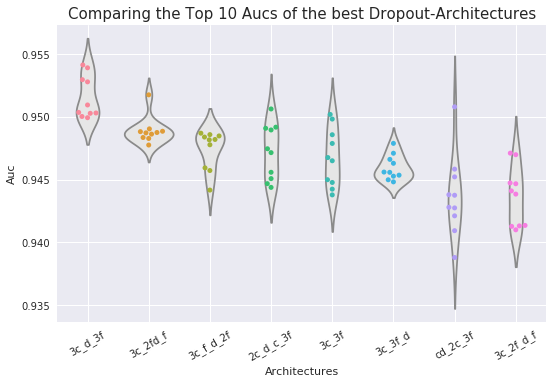

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

top = 10
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
folder = ['cccfff']

plot_auc = []
names = []

#titles = ['Plotting_cccfff', 'Plotting_cdccfff','Plotting_ccdcfff','Plotting_cccdfff','Plotting_cccfdff','Plotting_cccffdf', 'Plotting_cccfdfdf', 'Plotting_cccfdfdfd', 'Plotting_cdcdcdfff', 'Plotting_cccfffd']
titles = ['Plotting_cccfff', 'Plotting_cdccfff','Plotting_ccdcfff','Plotting_cccdfff','Plotting_cccfdff','Plotting_cccffdf', 'Plotting_cccfdfdf', 'Plotting_cccfffd']
plot_names = ['3c_3f', 'cd_2c_3f', '2c_d_c_3f', '3c_d_3f', '3c_f_d_2f', '3c_2f_d_f', '3c_2fd_f', '3c_3f_d']
names_dict = dict(zip(titles, plot_names))
for folder in [path for path in os.listdir(main_path) if path.split('_')[-1] in folder]:
    name =  folder.split('_')[-1]
    c = 0
    f = 0
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    name_new = str(c)+'c_'+str(f)+'f'
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')

    df = pd.read_csv(path)
    for run in titles:
        print('Good:', df[(df['Title']==run) & (df['Auc']>0.85)].shape[0], 'All:', df[(df['Title']==run)].shape[0], run)
        names.append(run)
        plot_auc.append(df[(df['Title']==run) & (df['Auc']>0.85)].head(20).sort_values(by='Auc', ascending=False).head(top)['Auc'].values.tolist())

        
plotting_data = []
plotting_names = []
for elem in zip(names, plot_auc):
    try:
        length = sorted(list(set([len(elem[1]) for elem in zip(names, plot_auc)])))[1]
    except:
        length = sorted(list(set([len(elem[1]) for elem in zip(names, plot_auc)])))[0]
    if len(elem[1])>=length:
        plotting_names.append(names_dict[elem[0]])
        plotting_data.append(elem[1][:length])

df_plot = pd.DataFrame(np.array(plotting_data).T, columns=plotting_names)
df_plot = df_plot[df_plot.mean().sort_values(ascending=False).index]

df_swarm = pd.melt(df_plot)
df_swarm.columns = ['Architectures', 'Auc']
sns.set(style='darkgrid', font='DejaVu Sans')
plt.title('Comparing the Top {} Aucs of the best Dropout-Architectures'.format(length), fontsize=15)
sns.violinplot(x="Architectures", y="Auc", data=df_swarm, inner=None, color=".9")
sns.swarmplot(x="Architectures", y="Auc", data=df_swarm)
plt.xticks(rotation=30)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('01_Finished_Plots/Randomized_Dropout_Model_Comparison.svg')
plt.show()

# Arrivaltimes

Lines in File 9478
Good lines 3204
24164365
9478
30
129


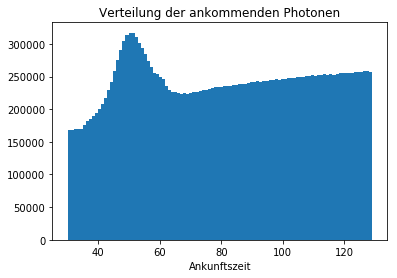

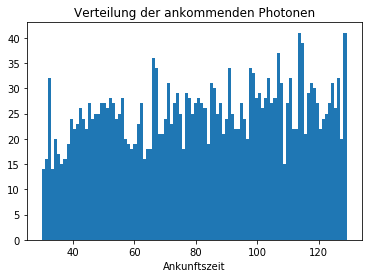

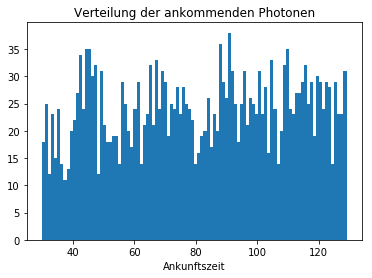

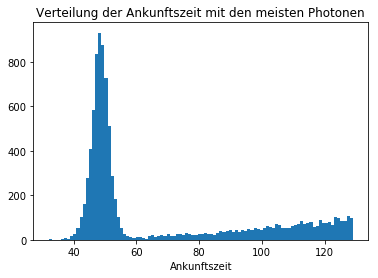

0.0
405.0
1961946000


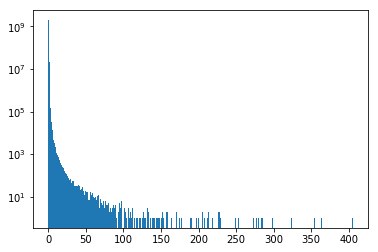

In [6]:
from multiprocessing import Pool
import numpy as np
import operator
import random
import pickle
import gzip
import json
import os

mc_data_path = '/net/big-tank/POOL/projects/fact/simulation/photon_stream/fact_tools/v.0.18.0/'
id_position_path = '/home/jbehnken/06_FACT_Pipeline/01_hexagonal_position_dict.p'

def getMetadata():
    '''
    Gathers the file paths of the training data
    '''
    # Iterate over every file in the subdirs and check if it has the right file extension
    file_paths = [os.path.join(dirPath, file) for dirPath, dirName, fileName in os.walk(os.path.expanduser(mc_data_path)) for file in fileName if '.json' in file]
    return file_paths

file_paths = getMetadata()
id_position = pickle.load(open(id_position_path, "rb"))

data = []
num = 0

photons = []
most = []
matricies = []
false_image = []
for path in file_paths[:1]:
    with gzip.open(path) as file:
        # Gamma=True, Proton=False
        label = True if 'gamma' in path else False
        
        lines = 0
        for line in file:
            lines += 1
            event_photons = json.loads(line.decode('utf-8'))['PhotonArrivals_500ps']
            
            event = []
            input_matrix = np.zeros([46,45,100])
            for i in range(1440):
                event.extend(event_photons[i])
                
                x, y = id_position[i]
                for value in event_photons[i]:
                    input_matrix[int(x)][int(y)][value-30] += 1
            
            photons.extend(event)
            matricies.append(input_matrix)
            
            count_dict = {}
            for i in event:
                if i in count_dict.keys():
                    count_dict[i] += 1
                else:
                    count_dict[i] = 1
                    
            sorted_dict = sorted(count_dict.items(), key=operator.itemgetter(1), reverse=True)
            one = sorted_dict[0][0]
            two = sorted_dict[1][0]
            most.extend([one])
            
            if one>70:
                false_image.append(event)
            
            if one==two or one==two+1 or one==two-1 and one>=30 and one<=60:
                input_matrix = np.sum(input_matrix[:,:,one-32:one-28], axis=2)
                data.append([input_matrix, label])
                
print('Lines in File', lines)
print('Good lines', len(data))

print(len(photons))

print(len(matricies))

import matplotlib.pyplot as plt
print(min(photons))
print(max(photons))

plt.hist(photons, bins=100)
plt.title('Verteilung der ankommenden Photonen')
plt.xlabel('Ankunftszeit')
plt.show()

for i in range(2):    
    plt.hist(false_image[i], bins=100)
    plt.title('Verteilung der ankommenden Photonen')
    plt.xlabel('Ankunftszeit')
    plt.show()
    
plt.hist(most, bins=98)
plt.title('Verteilung der Ankunftszeit mit den meisten Photonen')
plt.xlabel('Ankunftszeit')
plt.show()

matrizen = np.array(matricies).flatten()

print(np.min(matrizen))
print(np.max(matrizen))

print(len(matrizen))

plt.hist(matrizen, bins=406)
plt.yscale('log')
plt.show()

Good: 20 All: 21 without_pre
Good: 20 All: 20 with_5_100_pre
Good: 20 All: 20 with_10_100_pre


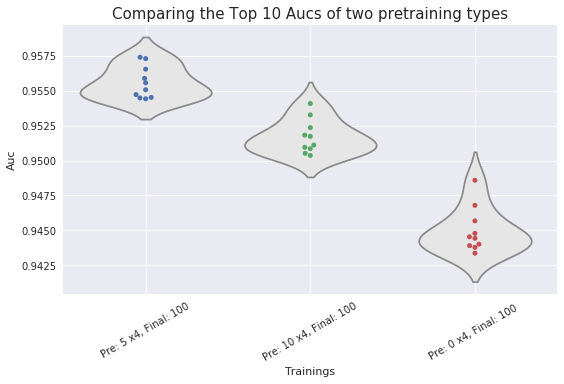

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

top = 10
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
folder = ['pre-cccfff']

plot_auc = []
names = []

titles = ['without_pre', 'with_5_100_pre', 'with_10_100_pre']
plot_names = ['Pre: 0 x4, Final: 100 ', 'Pre: 5 x4, Final: 100', 'Pre: 10 x4, Final: 100']
names_dict = dict(zip(titles, plot_names))
for folder in [path for path in os.listdir(main_path) if path.split('_')[-1] in folder]:
    name =  folder.split('_')[-1]
    c = 0
    f = 0
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    name_new = str(c)+'c_'+str(f)+'f'
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')

    df = pd.read_csv(path)
    for run in titles:
        print('Good:', df[(df['Title'].str.endswith(run)) & (df['Auc']>0.85)].shape[0], 'All:', df[(df['Title'].str.endswith(run))].shape[0], run)
        names.append(run)
        plot_auc.append(df[(df['Title'].str.endswith(run)) & (df['Auc']>0.85)].head(20).sort_values(by='Auc', ascending=False).head(top)['Auc'].values.tolist())

        
plotting_data = []
plotting_names = []
for elem in zip(names, plot_auc):
    examples = sorted(list(set([len(elem[1]) for elem in zip(names, plot_auc)])))
    length = min(examples)
    if length==0:
        length = examples[1]
    if len(elem[1])>=length:
        plotting_names.append(names_dict[elem[0]])
        plotting_data.append(elem[1][:length])

df_plot = pd.DataFrame(np.array(plotting_data).T, columns=plotting_names)
df_plot = df_plot[df_plot.max().sort_values(ascending=False).index]

df_swarm = pd.melt(df_plot)
df_swarm.columns = ['Trainings', 'Auc']
sns.set(style='darkgrid', font='DejaVu Sans')
plt.title('Comparing the Top {} Aucs of two pretraining types'.format(length), fontsize=15)
sns.violinplot(x="Trainings", y="Auc", data=df_swarm, inner=None, color=".9")
sns.swarmplot(x="Trainings", y="Auc", data=df_swarm)
plt.xticks(rotation=30)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('01_Finished_Plots/Randomized_Pretraining_Model_Comparison.svg')
plt.show()

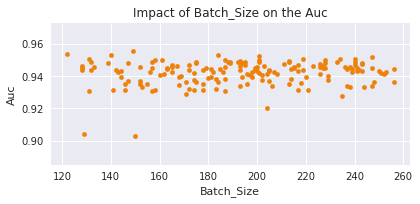

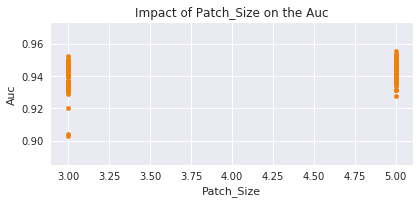

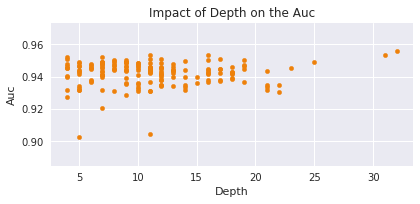

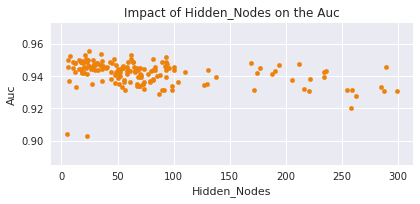

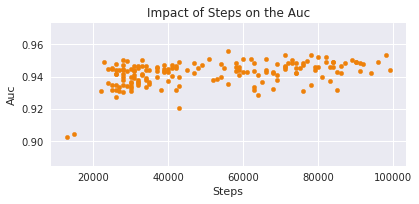

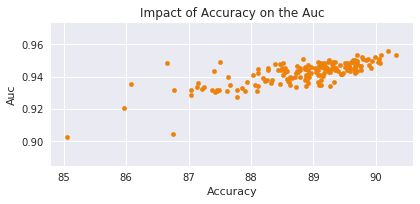

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

top = 10
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
folder = ['cccfff']

for folder in [path for path in os.listdir(main_path) if path.split('_')[-1] in folder]:
    name =  folder.split('_')[-1]
    c = 0
    f = 0
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    name_new = str(c)+'c_'+str(f)+'f'
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    df = pd.read_csv(path)
    
df_plot = df[(df['Auc']>0.85) & (df['Steps']<100000) & (df['Early_Stopped']==True)]
for column in ['Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Steps', 'Accuracy']:
    df_plot.plot.scatter(x=column, y='Auc', c=(238/255, 129/255, 10/255), figsize=(6,3))
    plt.title('Impact of {} on the Auc'.format(column))
    plt.tight_layout()
    plt.savefig('01_Finished_Plots/Randomized_Hyperparameter_{}_Comparison.png'.format(column), dpi=200)
    plt.show()

(20550000, 5)


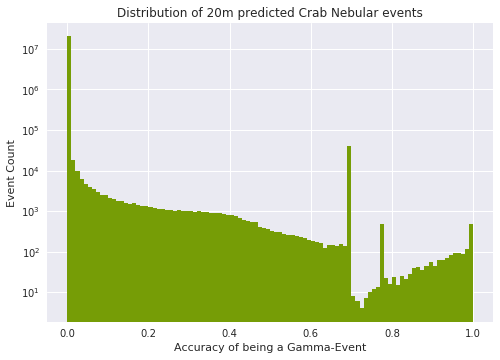

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/fhgfs/users/jbehnken/01_Data/04_Models/16_pre-cccfff/models_folder/103_with_5_100_pre_flat/Prediction.csv')
print(df.shape)

df.hist(['Gamma'], bins=100, color=(118/255, 157/255, 6/255))
plt.yscale('log')
plt.title('Distribution of 20m predicted Crab Nebular events')
plt.xlabel('Accuracy of being a Gamma-Event')
plt.ylabel('Event Count')
plt.savefig('01_Finished_Plots/Distribution_Crab_Prediction.png', dpi=200)
plt.show()